In [1]:
import os
import sys
import tarfile
import gif
import numpy as np
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_settings_v3 import *
from dismantling import get_index_list
from planar import create_proximity_graph, distance
from auxiliary import get_base_network_name, load_delta_data

fig_dir = '../draft/figs'
param = 'param'

In [10]:
L = 256
N = L*L
attack = 'BtwU'

size = {
    'Lattice': L,
    'PLattice': L,
    'DT': N,
    'PDT': N
}
#network = 'Lattice'
#network = 'PLattice'
network = 'DT'
seed = 90

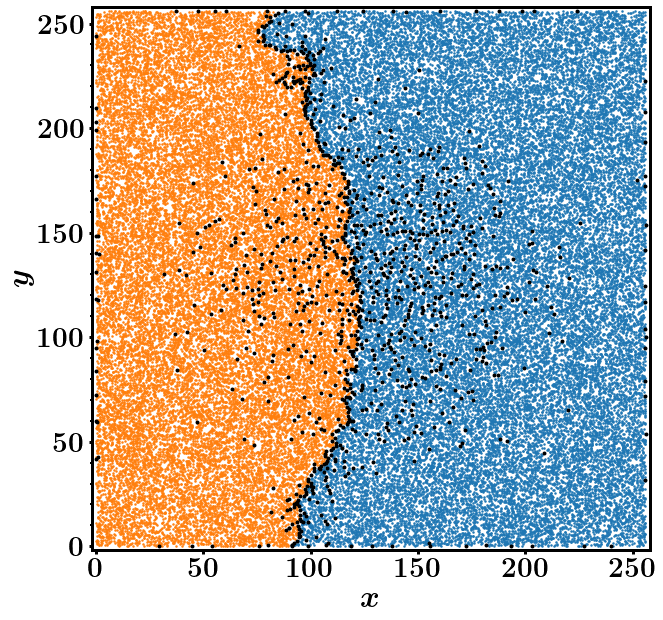

In [11]:
def plot(g, th, position):
    
    attack_order = g['attack_order']
    g.delete_vertices(attack_order[:th])

    components = g.components(mode='WEAK')
    gcc = components.giant()
    membership = np.array(components.membership)
    number, count = np.unique(membership, return_counts=True)
    number = number[np.argsort(count)[::-1]] 
    count = np.sort(count)[::-1]

    label_dict = dict((i, n) for i,n in enumerate(number))
    for idx in np.where(count==1)[0]:
        label_dict[idx] = -1
    
    plt.figure(figsize=(10,10))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xticks = range(L)
    plt.yticks = range(L)   
    plt.xlim(-2, L+2)
    plt.ylim(-2, L+2)
    
    if L <= 32:
        s1 = 80
        s2 = 40
    if L == 64:
        s1 = 30
        s2 = 15
    if L == 128:
        #s1 = 10
        #s2 = 5
        s1 = 14
        s2 = 1
    if L == 256:
        s1 = 6
        s2 = 1
    for oi in attack_order[:th]:
        plt.scatter(*position[oi], color='k', s=s1, zorder=10)
        
    for oi in attack_order[th:]:
        idx = g.vs['oi'].index(oi)
        plt.scatter(*position[oi], color=_colors[label_dict[membership[idx]]], s=s2, zorder=0)
        

_colors = 5*colors + ['grey']
g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)    
position = g.vs['position']
th = max_pos+1
plot(g, th, position)
fig_name = os.path.join(fig_dir, 'breaking_nodes_{}_L{}_{}'.format(network, L, attack))
dpi = 50
plt.savefig(fig_name + '.png', dpi=dpi)
plt.savefig(fig_name + '.pdf', dpi=dpi)
plt.show()

In [ ]:
@gif.frame
def plot(g, th, position):
    
    attack_order = g['attack_order']
    g.delete_vertices(attack_order[:th])

    components = g.components(mode='WEAK')
    gcc = components.giant()
    membership = np.array(components.membership)
    number, count = np.unique(membership, return_counts=True)
    number = number[np.argsort(count)[::-1]] 
    label_dict = dict((i, n) for i,n in enumerate(number))
    
    
    plt.figure(figsize=(10,10))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xticks = range(L)
    plt.yticks = range(L)   
    plt.xlim(-1, L)
    plt.ylim(-1, L)
    
    if L <= 32:
        s = 40
    if L == 64:
        s = 15
    if L == 128:
        s = 9
    for oi in attack_order[:th]:
        plt.scatter(*position[oi], color='k', s=s)
        
    for oi in attack_order[th:]:
        idx = g.vs['oi'].index(oi)
        plt.scatter(*position[oi], color=colors[label_dict[membership[idx]]], s=s)
        
frames = []
th = 0
while True:
    
    g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)    
    position = g.vs['position']
    frame = plot(g, th, position)
    frames.append(frame)
    
    print(th, max_pos)
    if th == max_pos + 1:
        frames += [frame] * 10
        break
    th += 1
    
gif.save(frames, '{}_L{}_seed{:05}.gif'.format(network, L, seed), duration=100)
print('Finish')

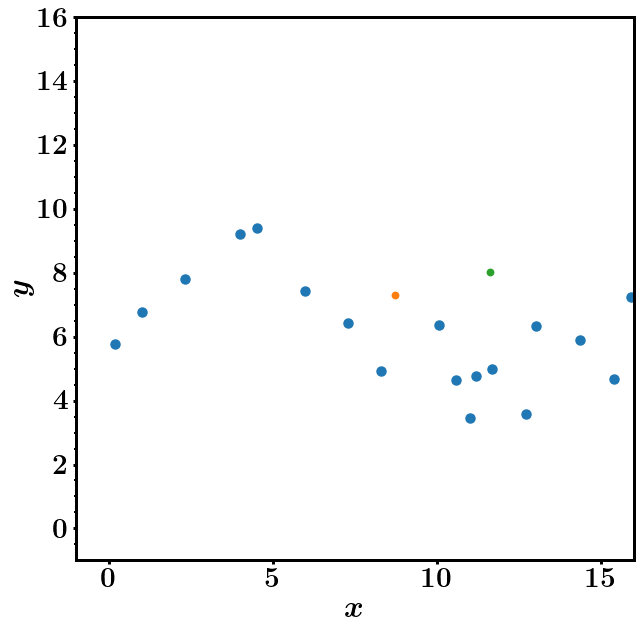

In [31]:
g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)

attack_order = g['attack_order']
position = g.vs['position']
to_delete = set(g.vs['oi']).difference(set(attack_order[:max_pos+1]))
g.delete_vertices(to_delete)

components = g.components(mode='WEAK')
gcc = components.giant()
membership = np.array(components.membership)
number, count = np.unique(membership, return_counts=True)
number = number[np.argsort(count)[::-1]] 
label_dict = dict((i, n) for i,n in enumerate(number))

plt.figure(figsize=(10,10))

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xticks = range(L)
plt.yticks = range(L)   
plt.xlim(-1, L)
plt.ylim(-1, L)

if L <= 32:
    s = 40
if L == 64:
    s = 15

for oi in attack_order[:max_pos+1]:
    idx = g.vs['oi'].index(oi)
    if label_dict[membership[idx]] == 0:
        _s = 2*s
    else:
        _s = s
    
    if label_dict[membership[idx]] >= len(colors):
        color = 'grey'
    else:
        color=colors[label_dict[membership[idx]]]
    plt.scatter(*position[oi], color=color, s=_s)

In [ ]:
@gif.frame
def plot(g, th, position):
    
    attack_order = g['attack_order']
    to_delete = set(g.vs['oi']).difference(set(attack_order[:max_pos+1]))
    g.delete_vertices(to_delete)

    components = g.components(mode='WEAK')
    gcc = components.giant()
    membership = np.array(components.membership)
    number, count = np.unique(membership, return_counts=True)
    number = number[np.argsort(count)[::-1]] 
    label_dict = dict((i, n) for i,n in enumerate(number))
    
    
    plt.figure(figsize=(10,10))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xticks = range(L)
    plt.yticks = range(L)   
    plt.xlim(-1, L)
    plt.ylim(-1, L)
    
    if L <= 32:
        s = 40
    if L == 64:
        s = 15
    if L == 128:
        s = 10
        
    for oi in attack_order[:th]:
        idx = g.vs['oi'].index(oi)
        if label_dict[membership[idx]] == 0:
            _s = 2*s
        else:
            _s = s

        if label_dict[membership[idx]] >= len(colors):
            color = 'grey'
        else:
            color=colors[label_dict[membership[idx]]]
        plt.scatter(*position[oi], color=color, s=_s)

frames = []
th = 0
while True:
    
    g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)    
    position = g.vs['position']
    frame = plot(g, th, position)
    frames.append(frame)
    
    print(th, max_pos)
    if th == max_pos + 1:
        frames += [frame] * 10
        break
    th += 1
    
gif.save(frames, 'removed_{}_L{}_seed{:05}.gif'.format(network, L, seed), duration=100)
print('Finish')

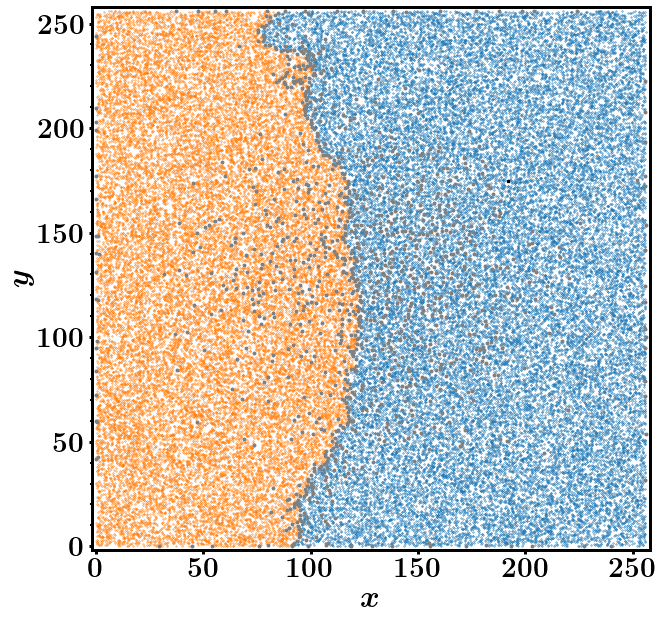

In [15]:
L = 256
N = L*L
attack = 'BtwU'
size = N
network = 'DT'
seed = 90


## Spanning subgraph of the removed nodes
h, max_pos, delta_max = load_delta_data(network, size, param, attack, seed)

attack_order = h['attack_order']
position = h.vs['position']
to_delete = set(h.vs['oi']).difference(set(attack_order[:max_pos+1]))
h.delete_vertices(to_delete)

components = h.components(mode='WEAK')
gcc = components.giant()
backbone_membership = np.array(components.membership)
number, count = np.unique(backbone_membership, return_counts=True)
number = number[np.argsort(count)[::-1]] 
backbone_label_dict = dict((i, n) for i,n in enumerate(number))

################

_colors = 5*colors + ['grey']
g, max_pos, delta_max = load_delta_data(network, size, param, attack, seed)    
position = g.vs['position']
th = max_pos+1
    
components = g.components(mode='WEAK')
gcc = components.giant()
membership = np.array(components.membership)
number, count = np.unique(membership, return_counts=True)
number = number[np.argsort(count)[::-1]] 
label_dict = dict((i, n) for i,n in enumerate(number))

attack_order = g['attack_order']
g.delete_vertices(attack_order[:th])

components = g.components(mode='WEAK')
gcc = components.giant()
membership = np.array(components.membership)
number, count = np.unique(membership, return_counts=True)
number = number[np.argsort(count)[::-1]] 
count = np.sort(count)[::-1]

label_dict = dict((i, n) for i,n in enumerate(number))
for idx in np.where(count==1)[0]:
    label_dict[idx] = -1

fig, ax = plt.subplots(figsize=(10,10))


ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xticks = range(L)
ax.set_yticks = range(L)   
ax.set_xlim(-2, L+2)
ax.set_ylim(-2, L+2)

if L <= 32:
    s1 = 80
    s2 = 40
if L == 64:
    s1 = 30
    s2 = 15
if L == 128:
    #s1 = 10
    #s2 = 5
    s1 = 14
    s2 = 1
    ax.set_xticks([0, 32, 64, 96, 128])
    ax.set_yticks([0, 32, 64, 96, 128])
if L == 256:
    s1 = 6
    s2 = 1
    
for oi in attack_order[:th]:
    idx = h.vs['oi'].index(oi)
    pos = np.array(position[oi])
    x, y = pos
    if backbone_label_dict[backbone_membership[idx]] == 0:
        plt.scatter(x, y, color='k', marker='*', s=s1, zorder=10)
    else:
        plt.scatter(x, y, color='0.5', marker='s', s=s1, zorder=5)
        
for oi in attack_order[th:]:
    idx = g.vs['oi'].index(oi)
    pos = np.array(position[oi])
    x, y = pos
    plt.scatter(
        x, y, color=_colors[label_dict[membership[idx]]], marker='.', s=s2, 
        zorder=0
    )


fig_name = os.path.join(fig_dir, 'breaking_nodes_{}_L{}_{}'.format(network, L, attack))
dpi = 50
plt.savefig(fig_name + '.png', dpi=dpi)
plt.savefig(fig_name + '.pdf', dpi=dpi)
plt.show()